In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
(cities)

['ushuaia',
 'carupano',
 'ilulissat',
 'iqaluit',
 'mys shmidta',
 'rikitea',
 'hilo',
 'putai',
 'mar del plata',
 'albany',
 'saint-pierre',
 'cururupu',
 'klaksvik',
 'roebourne',
 'cabo san lucas',
 'batagay',
 'xichang',
 'tiarei',
 'bubaque',
 'georgetown',
 'dejen',
 'chokurdakh',
 'bridlington',
 'port alfred',
 'lavra',
 'carnarvon',
 'taolanaro',
 'yulara',
 'barnstaple',
 'cidreira',
 'mataura',
 'upernavik',
 'iskateley',
 'attawapiskat',
 'mount isa',
 'turukhansk',
 'kavaratti',
 'chaihe',
 'atuona',
 'yellowknife',
 'fairbanks',
 'hasaki',
 'antofagasta',
 'areado',
 'palabuhanratu',
 'tumannyy',
 'kapaa',
 'vaini',
 'bilma',
 'hami',
 'the valley',
 'esperance',
 'labutta',
 'amderma',
 'norman wells',
 'tasiilaq',
 'kahului',
 'punta arenas',
 'saiha',
 'hermanus',
 'floriano',
 'hobart',
 'sawtell',
 'umred',
 'illoqqortoormiut',
 'oussouye',
 'arkhangelskoye',
 'hamilton',
 'andenes',
 'new norfolk',
 'nikolskoye',
 'bluff',
 'taoudenni',
 'lehi',
 'ureshino',
 'sin

In [4]:
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + api_key 
response = requests.get(url)
response

<Response [400]>

In [5]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Ushuaia
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=ushuaia
Processing Record 2 | Carupano
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=carupano
Processing Record 3 | Ilulissat
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=ilulissat
Processing Record 4 | Iqaluit
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=iqaluit
City not found. Skipping...
Processing Record 5 | Rikitea
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=rikitea
Processing Record 6 | Hilo
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=hilo
Processing Record 7 | Putai
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=putai
Processing Record 8 | Mar del 

Processing Record 62 | Nikolskoye
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=nikolskoye
Processing Record 63 | Bluff
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=bluff
Processing Record 64 | Taoudenni
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=taoudenni
Processing Record 65 | Lehi
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=lehi
Processing Record 66 | Ureshino
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=ureshino
Processing Record 67 | Sindor
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=sindor
Processing Record 68 | East London
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=east london
City not found. Skipping...
Processing Record 69 | Chara
https://api.openweathermap.org/data/2.5

City not found. Skipping...
Processing Record 124 | Vanimo
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=vanimo
City not found. Skipping...
Processing Record 125 | Vardo
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=vardo
Processing Record 126 | Kodiak
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=kodiak
Processing Record 127 | Panguna
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=panguna
Processing Record 128 | Chandler
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=chandler
City not found. Skipping...
Processing Record 129 | Bestobe
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=bestobe
Processing Record 130 | Shenjiamen
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=shenjiamen
Processing Re

Processing Record 186 | Agadir
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=agadir
Processing Record 187 | Hashtrud
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=hashtrud
City not found. Skipping...
Processing Record 188 | Thinadhoo
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=thinadhoo
Processing Record 189 | Huilong
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=huilong
Processing Record 190 | Avera
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=avera
Processing Record 191 | Faya
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=faya
Processing Record 192 | Tiksi
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=tiksi
Processing Record 193 | Airai
https://api.openweathermap.org/data/2.5/weather?a

Processing Record 247 | Ayan
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=ayan
Processing Record 248 | Hobyo
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=hobyo
Processing Record 249 | Indian Trail
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=indian trail
Processing Record 250 | Tilichiki
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=tilichiki
Processing Record 251 | Lodeynoye Pole
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=lodeynoye pole
Processing Record 252 | Vestmannaeyjar
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=vestmannaeyjar
Processing Record 253 | Lavrentiya
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=lavrentiya
Processing Record 254 | Marsh Harbour
https://api.openweath

City not found. Skipping...
Processing Record 308 | Hai Duong
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=hai duong
Processing Record 309 | Mungwi
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=mungwi
Processing Record 310 | Montbrison
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=montbrison
Processing Record 311 | Oum Hadjer
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=oum hadjer
Processing Record 312 | Puerto Ayora
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=puerto ayora
Processing Record 313 | Ust-Tsilma
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=ust-tsilma
Processing Record 314 | Lubango
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=lubango
Processing Record 315 | Srednekolymsk
h

Processing Record 370 | Kolokani
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=kolokani
Processing Record 371 | Ugoofaaru
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=ugoofaaru
City not found. Skipping...
Processing Record 372 | Namtsy
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=namtsy
Processing Record 373 | Kosh-Agach
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=kosh-agach
Processing Record 374 | Mabaruma
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=mabaruma
Processing Record 375 | Helong
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=helong
Processing Record 376 | Baykit
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=baykit
Processing Record 377 | Bundaberg
https://api.openweathermap.

Processing Record 431 | Gat
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=gat
Processing Record 432 | Moree
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=moree
Processing Record 433 | Teya
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=teya
Processing Record 434 | Petrove
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=petrove
Processing Record 435 | Bagdarin
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=bagdarin
City not found. Skipping...
Processing Record 436 | La Ronge
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=la ronge
Processing Record 437 | Mana
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=mana
Processing Record 438 | Tazovskiy
https://api.openweathermap.org/data/2.5/weather?appid=e

Processing Record 493 | Skibbereen
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=skibbereen
City not found. Skipping...
Processing Record 494 | Youkounkoun
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=youkounkoun
Processing Record 495 | Cayenne
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=cayenne
Processing Record 496 | Dwarka
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=dwarka
Processing Record 497 | Codrington
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=codrington
Processing Record 498 | Henties Bay
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=henties bay
City not found. Skipping...
Processing Record 499 | Winnemucca
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=winnemucca
Processin

City not found. Skipping...
Processing Record 554 | Elat
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=elat
Processing Record 555 | Mentougou
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=mentougou
Processing Record 556 | Klyuchi
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=klyuchi
Processing Record 557 | Coahuayana
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=coahuayana
City not found. Skipping...
Processing Record 558 | Ust-Kuyga
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=ust-kuyga
Processing Record 559 | Mayo
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=mayo
Processing Record 560 | Znamenskoye
https://api.openweathermap.org/data/2.5/weather?appid=e344ac0ed5ad90b74357b48070418a09&q=znamenskoye
City not found. Skipping...
Pro

In [6]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          579
Cloudiness    579
Country       579
Date          579
Humidity      579
Lat           579
Lng           579
Max Temp      579
Wind Speed    579
dtype: int64

In [7]:
# Save data frame to CSV
weather_data.to_csv("output_weather_data.csv")

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,1553882400,62,-54.81,-68.31,286.150,16.50
1,Carupano,32,VE,1553886529,78,10.67,-63.26,300.417,5.26
2,Ilulissat,75,GL,1553881800,48,69.22,-51.10,266.150,4.10
3,Iqaluit,90,CA,1553886122,79,63.75,-68.52,268.150,7.20
4,Rikitea,92,PF,1553886533,100,-23.12,-134.97,298.217,4.76


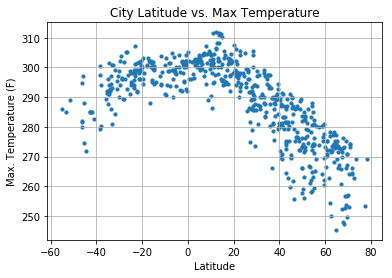

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Add the other graph data
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Plot_Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

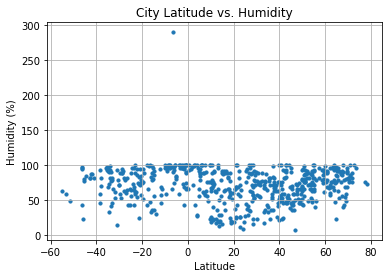

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Add the other graph data
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Plot_Humidity_vs_Latitude.png")

# Show plot
plt.show()

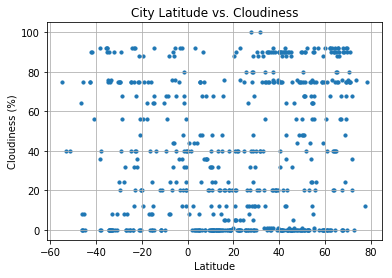

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Plot_Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

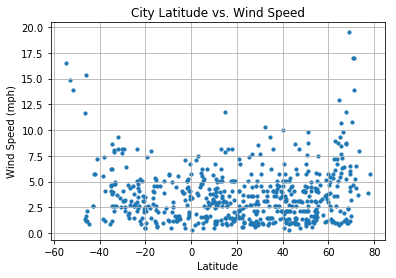

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Add the other graph data
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Plot_Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()